In [1]:
from plot_scripts import *

plt.rcParams['font.size'] = 13 # all font sizes to 13

## User preferences 

#### General specifications

In [2]:
maxdist = 100        # Maximum distance (pc) of stars included in the background HR diagram
cmap = 'inferno'     # Colormap used for the data
dereddened = True    # Whether background star magnitudes are dereddened
logg_or_MH = 'logg'  # Color-coding parameter: 'logg' for log(g) or 'MH' for [M/H]

#### Target specific specifications
- Define a dictionary with the target name as the key:
    ```python
    target_specs = {
        'target_name': {}
    }
    
    ```
- Optional plotting and identification parameters can be specified as:
    ```python
    target_specs = {
        'target_name': {
        'text_dx': float,
        'text_dy': float,
        'markersize': int,
        'markershape': str,
        'dereddened': bool,
        'Gaia_ID': float,
        'RA': float,   # degrees
        'Dec': float,  # degrees
        'fontweight': str
        }
    }
    ```
    
*Annotation requirements:* Both `text_dx` and `text_dy` must be provided to annotate the marker with the target name. `fontweight` can be used to make the annotation `'bold'` or `'italic'`. </br>
*Marker configuration:* `markersize` and `markershape` define the target marker (defaults: `7` and `'s'`). </br>
*Dereddening behaviour:* `dereddened` here is for the general setting, but can be overridden per target (e.g. if no dereddening values are available). </br>
*Target identification fallback:* If the target is not resolved via the SIMBAD query, the code will ask for `Gaia_ID` (DR3), `RA` (deg), and/or `Dec` (deg), which can be specified here.


In [3]:
target_specs = {
    'TOI-1227': dict(text_dx=35, text_dy=-5, markersize=5, markershape='o'),
    'TOI-2341': dict(text_dx=30, text_dy=5, markersize=5, markershape='o', Gaia_ID=6474214430473957504),
    'TOI-2455': dict(text_dx=-55, text_dy=-55, markersize=5, markershape='o', Gaia_ID=3311529431437442560),
    'TOI-3288': dict(text_dx=10, text_dy=30, fontweight='bold'),
    'TOI-3463': dict(text_dx=-40, text_dy=40, markersize=5, markershape='o', Gaia_ID=5878095853397405568, dereddened=False),
    'TOI-4666': dict(text_dx=-130, text_dy=-40, fontweight='bold'),
    'TOI-3216': dict(text_dx=30, text_dy=-20, markersize=5, markershape='o', dereddened=False),
    'TOI-3209': dict(text_dx=10, text_dy=-50, markersize=5, markershape='o', dereddened=False),
    'TOI-5295': dict(text_dx=10, text_dy=-50, markersize=5, markershape='o'),
    'TOI-3153': dict(text_dx=-60, text_dy=30, markersize=5, markershape='o', dereddened=False),
    'TOI-4261': dict(text_dx=-90, text_dy=-20, markersize=5, markershape='o', dereddened=False),
}           

### Download necessary Gaia data
Automatically downloads the required Gaia data up to the specified maximum distance.
The data are downloaded only once; if the maximum distance is increased, the existing dataset is extended to include the additional stars.

**If this is the first time running this line, it might take some time.**

In [4]:
!python download_gaia_data.py --dmax=$((maxdist + 20))

## Default plotting settings

In [5]:
defaults = {'Gaia_ID': None,
            'RA': None,
            'Dec': None,
            'markersize': 7,
            'markershape': 's',
            'text_dx': None,
            'text_dy': None,
            'dereddened': dereddened,
            'fontweight': 'normal'}

for target_name in target_specs.keys():
    for ky in defaults.keys():
        if ky not in target_specs[target_name].keys():
            target_specs[target_name][ky] = defaults[ky]    

## Make the HR diagram

Number of stars within maximum distance (100 pc): 102077

TOI-1227
Gaia ID: 5842480953772012928
	 Teff (Gaia GSP-Phot): 3369.90
	 Teff (GBP-GRP approximation): 3150.50

TOI-2341
Gaia ID: 6474214430473957504
	 Teff (Gaia GSP-Phot): 3582.78
	 Teff (GBP-GRP approximation): 3552.58

TOI-2455
Gaia ID: 3311529431437442560
RUWE >= 1.4!
	 Teff (Gaia GSP-Phot): 3718.55
	 Teff (GBP-GRP approximation): 3643.10

TOI-3288
Gaia ID: 6685431748042347776
	 Teff (Gaia GSP-Phot): 4227.07
	 Teff (GBP-GRP approximation): 4103.20

TOI-3463
Gaia ID: 5878095853397405568
parallax_over_error < 10

TOI-4666
Gaia ID: 4855422771071903232
	 Teff (Gaia GSP-Phot): 3900.90
	 Teff (GBP-GRP approximation): 3800.14

TOI-3216
Gaia ID: 5334669068989106176
parallax_over_error < 10

TOI-3209
Gaia ID: 5335667494267352960
parallax_over_error < 10
	 Teff (Gaia GSP-Phot): 6310.72

TOI-5295
Gaia ID: 2437966171858282112
RUWE >= 1.4!
	 Teff (Gaia GSP-Phot): 3574.34
	 Teff (GBP-GRP approximation): 3546.06

TOI-3153
Gaia ID: 53381006

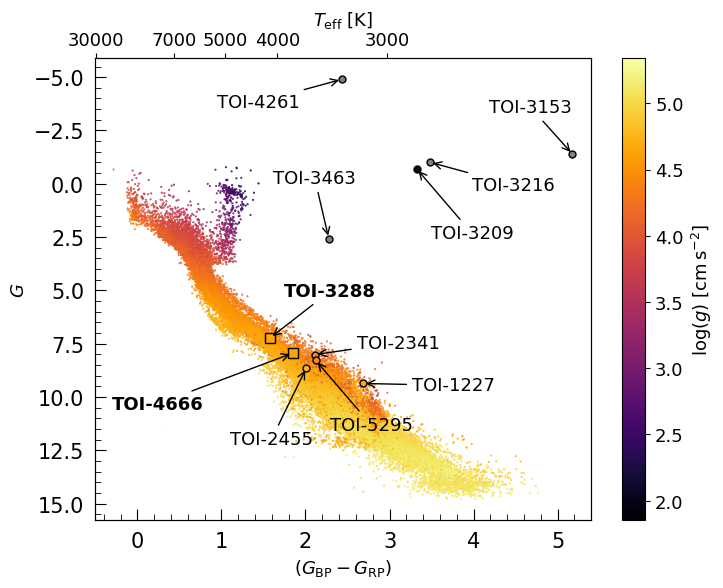

In [6]:
# 1. Load the background data (HR diagram of the target stars within the maximum distance).
cb = background_data_scatter(maxdist=maxdist, cmap=cmap, dereddened=dereddened, logg_or_mh=logg_or_MH)

# 2. Overplot the specified targets
for target_name in target_specs.keys():
    Gaia_specific_star(target_name, cb, Gaia_ID=target_specs[target_name]['Gaia_ID'], RA=target_specs[target_name]['RA'], 
                       Dec=target_specs[target_name]['Dec'], markersize=target_specs[target_name]['markersize'], 
                       markershape=target_specs[target_name]['markershape'], cmap=cmap, text_dx=target_specs[target_name]['text_dx'], 
                       text_dy=target_specs[target_name]['text_dy'], dereddened=target_specs[target_name]['dereddened'], 
                       logg_or_mh=logg_or_MH, fontweight=target_specs[target_name]['fontweight'])

# 3. Freedom to tweak the figure to make it better suited for your science case. (xlim, etc.)
plt.xlim([-0.5, 5.4])

# 4. Standard plot ticks includes an axis on top where the effective temperature is approximated from the GBP-GRP colour.
standard_plot_ticks()

# 5. Save figure
plt.savefig('HR_diagram_example.png', dpi=300, bbox_inches='tight')